In [2]:
import pandas as pd
import numpy as np

In [3]:
## Read file .csv
df_train= pd.read_csv('fraudTrain.csv')
df_test= pd.read_csv('fraudTest.csv')

In [3]:
## join df_train & df_test into one table for easily cleaning
df_data= pd.concat([df_test,df_train]) 
df_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile= ProfileReport(df_data.sample(n=1000))
profile

C:\Users\Quynh Nhu\AppData\Local\Temp\ipykernel_11764\2065924110.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


NameError: name 'df_data' is not defined

In [5]:
df_data.shape
df_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Comment: 
- Dataset have no missing values in 23 columns
- Target column 'is_fraud' is highly imbalanced (95.3%)
- Excluding the features have high cardinality like: trans_date_trans_time, first, last, trans_num, unix_time
- To optimize model, we just keep locational features related to card holder that have numeric type like: lat, long 
- As heatmap, the features have high correlation with target column: amt, category
- The other features: [gender, dob, job] will be EDA to check the correlation with target column.

# EDA

### Gender

In [6]:
gender_no_fraud= df_data[df_data['is_fraud']==0].groupby('gender')[['trans_num']].count()
gender_no_fraud.rename(columns={'trans_num':'no_fraud'},inplace= True)
gender_fraud= df_data[df_data['is_fraud']==1].groupby('gender')[['trans_num']].count()
gender_fraud.rename(columns={'trans_num':'fraud'},inplace= True)

gender_fraud= gender_no_fraud.merge(gender_fraud, on='gender',how='left')
gender_fraud['%fraud'] = gender_fraud['fraud']/(gender_fraud['fraud']+gender_fraud['no_fraud'])
gender_fraud['%no_fraud'] = gender_fraud['no_fraud']/(gender_fraud['fraud']+gender_fraud['no_fraud'])


In [7]:
gender_fraud

,no_fraud,fraud,%fraud,%no_fraud
gender,,,,
F,1009850,4899,0.004828,0.995172
M,832893,4752,0.005673,0.994327


COMMENT:
- There is not significant difference between F & M about fraud ==> So 'Gender' is not related to 'is_fraud'

### DOB

In [8]:
df_data
df_data['dob'] = pd.to_datetime(df_data['dob']).dt.year

dob_no_fraud= df_data[df_data['is_fraud']==0].groupby('dob')[['trans_num']].count().reset_index()
dob_fraud= df_data[df_data['is_fraud']==1].groupby('dob')[['trans_num']].count().reset_index()

dob_fraud= dob_no_fraud.merge(dob_fraud, on='dob', how='left')

dob_fraud.rename(columns={'trans_num_x':'no_fraud','trans_num_y':'fraud'},inplace= True)
dob_fraud['%fraud']= dob_fraud['fraud']/(dob_fraud['no_fraud']+dob_fraud['fraud'])
dob_fraud.sort_values(ascending=False, by='%fraud')


,dob,no_fraud,fraud,%fraud
7,1932,2917,48,0.016189
18,1943,5103,61,0.011813
15,1940,8741,103,0.011646
71,1996,8728,96,0.010879
9,1934,5098,54,0.010481
...,...,...,...,...
60,1985,53161,174,0.003262
59,1984,56779,185,0.003248
50,1975,42973,139,0.003224
78,2004,10935,32,0.002918


In [9]:
dob_fraud['%fraud'].describe()

count    80.000000
mean      0.006015
std       0.002362
min       0.002396
25%       0.004325
50%       0.005615
75%       0.007014
max       0.016189
Name: %fraud, dtype: float64

COMMENT:
- As we can see, the %fraud of all dob values is same (the mean & median have values so similiar). 
- We will find outliers in boxplot

<Axes: >

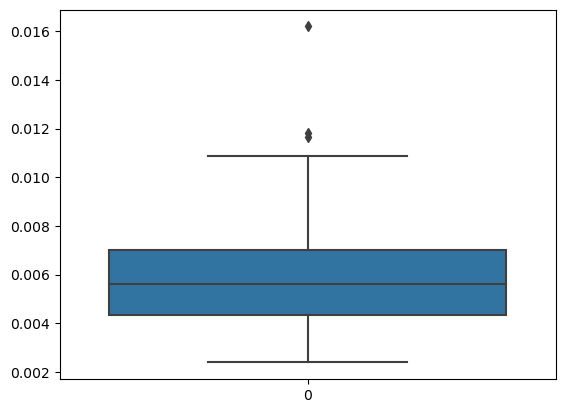

In [10]:
import seaborn as sns
sns.boxplot(data= dob_fraud['%fraud'])

In [11]:
x= dob_fraud['%fraud'].tolist()
y = np.nanpercentile(x,88)
y

0.008828453483647442

In [12]:
dob_filter= dob_fraud[dob_fraud['%fraud']>y]
dob_filter

,dob,no_fraud,fraud,%fraud
0,1924,728,7,0.009524
7,1932,2917,48,0.016189
9,1934,5098,54,0.010481
12,1937,5096,47,0.009139
15,1940,8741,103,0.011646
18,1943,5103,61,0.011813
32,1957,16722,162,0.009595
36,1961,24040,216,0.008905
38,1963,18928,181,0.009472
71,1996,8728,96,0.010879


COMMENT:
- There are some outliers which are useful for model. Exclude observations that are less useful (low %fraud) 


In [13]:
#  Replace values of dob column into 'other' if its %fraud is > pt88 list
df_data['dob']= df_data['dob'].apply(lambda x: 'other' if x not in dob_filter['dob'].tolist() else x)

## JOB

In [14]:

job_fraud= df_data[df_data['is_fraud']==1].groupby('job')[['trans_num']].count()
job_fraud.rename(columns={'trans_num':'fraud'},inplace= True)
job_no_fraud= df_data[df_data['is_fraud']==0].groupby('job')[['trans_num']].count().reset_index()
job_no_fraud.rename(columns={'trans_num':'no_fraud'},inplace= True)

job_fraud= job_no_fraud.merge(job_fraud, on='job', how='left')
job_fraud['%fraud']= job_fraud['fraud']/(job_fraud['no_fraud']+job_fraud['fraud'])
job_fraud= job_fraud.sort_values(ascending=False, by='fraud')
job_fraud

,job,no_fraud,fraud,%fraud
367,Quantity surveyor,8011,69.0,0.008540
295,Naval architect,12368,66.0,0.005308
273,Materials engineer,11649,62.0,0.005294
39,Audiological scientist,8743,58.0,0.006590
404,Senior tax professional/tax inspector,5820,57.0,0.009699
...,...,...,...,...
209,Health physicist,4371,3.0,0.000686
101,Contractor,4364,2.0,0.000458
154,"Engineer, communications",2190,NaN,NaN
156,"Engineer, drilling",2920,NaN,NaN


COMMENT:
- As table, 3 types of job have no fraud: 'Engineer, communications', 'Engineer, drilling', Stage manager. ==> Remove these job to reduce observations

In [15]:
filter = ['Engineer, communications', 'Engineer, drilling', 'Stage manager']
job_fraud= job_fraud[-job_fraud['job'].isin(filter)]
job_fraud

,job,no_fraud,fraud,%fraud
367,Quantity surveyor,8011,69.0,0.008540
295,Naval architect,12368,66.0,0.005308
273,Materials engineer,11649,62.0,0.005294
39,Audiological scientist,8743,58.0,0.006590
404,Senior tax professional/tax inspector,5820,57.0,0.009699
...,...,...,...,...
115,"Designer, exhibition/display",4374,4.0,0.000914
241,Interpreter,2182,4.0,0.001830
417,Statistician,3642,3.0,0.000823
209,Health physicist,4371,3.0,0.000686


In [16]:
job_fraud['%fraud'].describe()

count    472.000000
mean       0.006545
std        0.004564
min        0.000458
25%        0.003842
50%        0.005451
75%        0.007749
max        0.042105
Name: %fraud, dtype: float64

<Axes: >

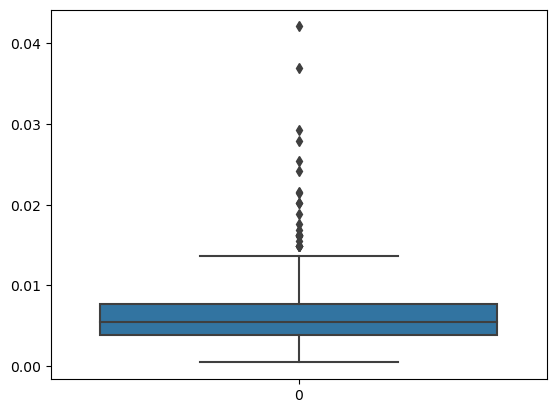

In [17]:
sns.boxplot(data= job_fraud['%fraud'])

In [18]:
x= job_fraud['%fraud'].tolist()
y = np.nanpercentile(x,95)
y

0.014864864864864866

In [19]:
job_filter= job_fraud[job_fraud['%fraud']>y]

COMMENT:
1. As we can see, the %fraud of all job values is same (the mean & median have values so similiar). 
2. However, there are some outliers we can add to the model for optimization.

In [20]:
# Replace values of job column into 'other' if its %fraud is > pt95 list
df_data['job']= df_data['job'].apply(lambda x: 'other' if x not in job_filter['job'].tolist() else x)

## Conclusion:
After EDA we will keep the below columns to the model:
1. cc_num: the primary key of dataset
2. amt, category: they have high correlation with target column (following to Heatmap)
3. lat, long: the location of card holder but in numeric type
4. dob: year of birth of the card holder (keep dob values have % fraud > percentile 88)
5. job: the job of card holder (keep job values have % fraud > percentile 95)

In [21]:
## Select features
df_data = df_data[['cc_num','amt','category','lat','long','dob','job', 'is_fraud']]
df_data

,cc_num,amt,category,lat,long,dob,job,is_fraud
0,2291163933867244,2.86,personal_care,33.9659,-80.9355,other,other,0
1,3573030041201292,29.84,personal_care,40.3207,-110.4360,other,other,0
2,3598215285024754,41.28,health_fitness,40.6729,-73.5365,other,other,0
3,3591919803438423,60.05,misc_pos,28.5697,-80.8191,other,other,0
4,3526826139003047,3.19,travel,44.2529,-85.0170,other,other,0
...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,entertainment,37.7175,-112.4777,1961,other,0
1296671,6011149206456997,51.70,food_dining,39.2667,-77.5101,other,other,0
1296672,3514865930894695,105.93,food_dining,32.9396,-105.8189,other,other,0
1296673,2720012583106919,74.90,food_dining,43.3526,-102.5411,other,other,0


### Encoding the categorial data into numerics

In [22]:
def onehot_encoded(data, list_columns): 
    
    from sklearn.preprocessing import OneHotEncoder
    one_hot_data = pd.get_dummies(data, columns = list_columns)
    print('DONE')
    return one_hot_data

list_columns= ['job','category','dob']
df_data= onehot_encoded(df_data,list_columns)
df_data

DONE


,cc_num,amt,lat,long,is_fraud,"job_Accountant, chartered certified",job_Artist,job_Charity officer,job_Civil Service administrator,job_Clinical cytogeneticist,...,dob_1932,dob_1934,dob_1937,dob_1940,dob_1943,dob_1957,dob_1961,dob_1963,dob_1996,dob_other
0,2291163933867244,2.86,33.9659,-80.9355,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3573030041201292,29.84,40.3207,-110.4360,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3598215285024754,41.28,40.6729,-73.5365,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3591919803438423,60.05,28.5697,-80.8191,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3526826139003047,3.19,44.2529,-85.0170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1296671,6011149206456997,51.70,39.2667,-77.5101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1296672,3514865930894695,105.93,32.9396,-105.8189,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1296673,2720012583106919,74.90,43.3526,-102.5411,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df_data.columns

Index(['cc_num', 'amt', 'lat', 'long', 'is_fraud',
       'job_Accountant, chartered certified', 'job_Artist',
       'job_Charity officer', 'job_Civil Service administrator',
       'job_Clinical cytogeneticist', 'job_Community development worker',
       'job_Conservator, museum/gallery', 'job_Economist',
       'job_Engineer, structural', 'job_Field trials officer',
       'job_Geneticist, molecular', 'job_Horticultural consultant',
       'job_Jewellery designer', 'job_Lawyer', 'job_Magazine journalist',
       'job_Medical technical officer', 'job_Minerals surveyor',
       'job_Nature conservation officer', 'job_Pharmacist, hospital',
       'job_TEFL teacher', 'job_Television camera operator', 'job_Writer',
       'job_other', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
   

In [24]:
df_data.shape

(1852394, 53)

## Scaling/Normalization

Because ['job','category','dob'].columns are in binary format 0-1, so we just need to normalize the last 4 columns

In [25]:
def normalize(data, list_columns):

    from sklearn.preprocessing import MinMaxScaler
    
    
    #Filter the data that contains list columns need to normalize:
    filter_df = data[list_columns]
    
    #Scale Feature: 
    scaler = MinMaxScaler()
    model=scaler.fit(filter_df)
    scaled_data=model.transform(filter_df)
    
    #Scaled data to dataframe: 
    scaled_data = pd.DataFrame(scaled_data, columns = list_columns)
    
    #Drop column in original data and merge with scaled data: 
    data.drop(columns = list_columns, inplace = True)
    # data = data.join(scaled_data)
    print('DONE')
    
    return data.join(scaled_data)
list_columns= ['cc_num','amt','lat','long']
df_data= normalize(df_data, list_columns)
df_data

DONE


,is_fraud,"job_Accountant, chartered certified",job_Artist,job_Charity officer,job_Civil Service administrator,job_Clinical cytogeneticist,job_Community development worker,"job_Conservator, museum/gallery",job_Economist,"job_Engineer, structural",...,dob_1943,dob_1957,dob_1961,dob_1963,dob_1996,dob_other,cc_num,amt,lat,long
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.589232e-04,0.000064,0.298692,0.867121
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.589232e-04,0.000064,0.298692,0.867121
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,7.156895e-04,0.000996,0.434867,0.565239
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,7.156895e-04,0.000996,0.434867,0.565239
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,7.207342e-04,0.001391,0.442414,0.942836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,9.140281e-07,0.002033,0.476465,0.727735
1296671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,8.882238e-08,0.001545,0.139328,0.855291
1296672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,9.020009e-01,0.000239,0.170560,0.856086
1296673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6.044921e-06,0.002489,0.226393,0.699771


In [26]:
df_data.columns

Index(['is_fraud', 'job_Accountant, chartered certified', 'job_Artist',
       'job_Charity officer', 'job_Civil Service administrator',
       'job_Clinical cytogeneticist', 'job_Community development worker',
       'job_Conservator, museum/gallery', 'job_Economist',
       'job_Engineer, structural', 'job_Field trials officer',
       'job_Geneticist, molecular', 'job_Horticultural consultant',
       'job_Jewellery designer', 'job_Lawyer', 'job_Magazine journalist',
       'job_Medical technical officer', 'job_Minerals surveyor',
       'job_Nature conservation officer', 'job_Pharmacist, hospital',
       'job_TEFL teacher', 'job_Television camera operator', 'job_Writer',
       'job_other', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category

# Apply Model

In [27]:
# seperate features and target:
X = df_data.drop('is_fraud',axis=1)
y = df_data['is_fraud']

In [28]:
# Split data into Train & Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)
print (X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(1481915, 52) (1481915,) (370479, 52) (370479,)


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

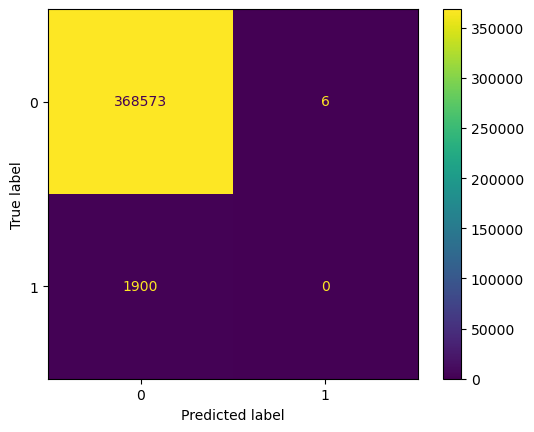

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction_test, labels= clf.classes_)
dp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_ )
dp.plot()
plt.show()

In [31]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368579
           1       0.00      0.00      0.00      1900

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [51]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
print(balanced_accuracy_score(y_test,prediction_test))
print(balanced_accuracy_score(y_train,prediction_train))

0.4999918606323203
0.4999955907212495


F1-score of Logistic Regression Model is 0 ==> We don't choose this model

## Decision Tree

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [35]:
y_tree_pre_train= clf.predict(X_train)
y_tree_pre_test= clf.predict(X_test)

In [36]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_train, y_tree_pre_train))
print(balanced_accuracy_score(y_test, y_tree_pre_test))

0.9794220100632176
0.5427060398820449


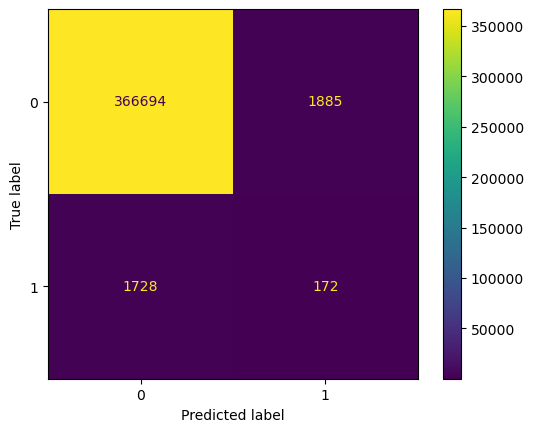

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_tree_pre_test, labels= clf.classes_)
dp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_ )
dp.plot()

In [38]:
print(classification_report(y_test,y_tree_pre_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    368579
           1       0.08      0.09      0.09      1900

    accuracy                           0.99    370479
   macro avg       0.54      0.54      0.54    370479
weighted avg       0.99      0.99      0.99    370479



In [52]:
print(classification_report(y_train,y_tree_pre_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474164
           1       1.00      0.96      0.98      7751

    accuracy                           1.00   1481915
   macro avg       1.00      0.98      0.99   1481915
weighted avg       1.00      1.00      1.00   1481915



In [39]:
# Extract feature importances
importance = clf.feature_importances_

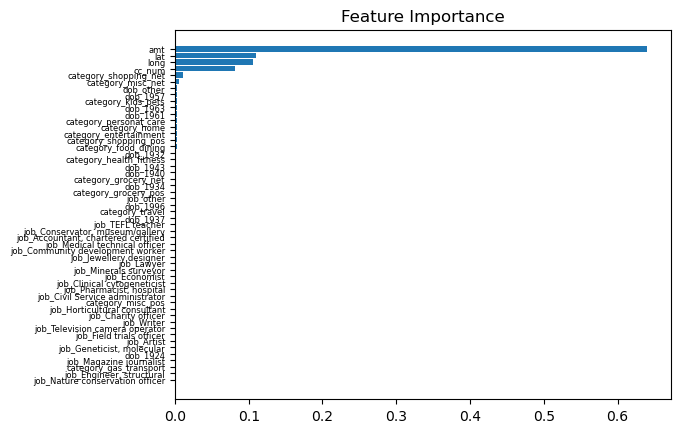

In [40]:
indices = np.argsort(importance)
fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title('Feature Importance')
ax.yaxis.set_tick_params(labelsize=6)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_tree_pre_test)

0.9902477603318947

#### As bar chat, there are 4 important features, amt is the highest important to the model.

## Random Forest

In [58]:
## Choose 4 important features to optimize model
X= df_data[['amt','long','lat','cc_num']]
y= df_data['is_fraud']

In [59]:
# split Train & Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)
print (X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(1481915, 4) (1481915,) (370479, 4) (370479,)


In [60]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(max_depth= 2,random_state=0)
clf.fit(X_train,y_train)
y_for_pre_train= clf.predict(X_train)
y_for_pre_test= clf.predict(X_test)

In [48]:
print(balanced_accuracy_score(y_train, y_for_pre_train))
print(balanced_accuracy_score(y_test, y_for_pre_test))

0.5
0.5


# Conclusion:
The balace accuracy:
- Logistic Regression: 0.49 but F1-score = 0 ==> Dont choose this model
- Decision Tree: 0.54 and seems to be overfitting because F1-score of train dataset is bigger than F1-score of Test dataset
- Random Forest: 0.5 
- ==>> We can consider to choose Decision Tree or Random Forest that is the best choice.
